In [1]:
# An implementaion of how to display all of the exchanges and market data sources that 
# are available on the CCXT trading library.

import ccxt
print(ccxt.exchanges)

['_1broker', '_1btcxe', 'acx', 'allcoin', 'anxpro', 'anybits', 'bibox', 'binance', 'bit2c', 'bitbank', 'bitbay', 'bitfinex', 'bitfinex2', 'bitflyer', 'bithumb', 'bitkk', 'bitlish', 'bitmarket', 'bitmex', 'bitsane', 'bitso', 'bitstamp', 'bitstamp1', 'bittrex', 'bitz', 'bl3p', 'bleutrade', 'braziliex', 'btcbox', 'btcchina', 'btcexchange', 'btcmarkets', 'btctradeim', 'btctradeua', 'btcturk', 'btcx', 'bxinth', 'ccex', 'cex', 'chbtc', 'chilebit', 'cobinhood', 'coinbase', 'coinbasepro', 'coincheck', 'coinegg', 'coinex', 'coinexchange', 'coinfalcon', 'coinfloor', 'coingi', 'coinmarketcap', 'coinmate', 'coinnest', 'coinone', 'coinsecure', 'coinspot', 'cointiger', 'coolcoin', 'crypton', 'cryptopia', 'deribit', 'dsx', 'ethfinex', 'exmo', 'exx', 'fcoin', 'flowbtc', 'foxbit', 'fybse', 'fybsg', 'gatecoin', 'gateio', 'gdax', 'gemini', 'getbtc', 'hadax', 'hitbtc', 'hitbtc2', 'huobi', 'huobicny', 'huobipro', 'ice3x', 'independentreserve', 'indodax', 'itbit', 'jubi', 'kraken', 'kucoin', 'kuna', 'lakebt

In [43]:
# An example of how to instantiate and load an exchange to see all of the tickers available for 
# trade on the exchange. 

import ccxt

exchange = ccxt.gemini()
markets = exchange.load_markets() 
symbols = exchange.symbols


print(exchange.id, symbols)

gemini ['BTC/USD', 'ETH/BTC', 'ETH/USD', 'ZEC/BTC', 'ZEC/ETH', 'ZEC/USD']


In [46]:
# implementation of bid, ask and spread data based on exchanges generated from 
# the ccxt trading library system; specifaclly 'Gemini Exchange'

import ccxt
import time

exchange = ccxt.gemini()
exchange.load_markets()
print('Rate Limit for Gemini Exchange: ', exchange.rateLimit)
delay_seconds = exchange.rateLimit/ 1000
symbols = dict()


for symbol in exchange.markets: 

    start_time = time.clock() 
    orderbook = exchange.fetch_order_book(symbol)
    bid = orderbook['bids'][0][0] if len(orderbook['bids']) > 0 else None
    ask = orderbook['asks'][0][0] if len(orderbook['asks']) > 0 else None
    spread = (ask - bid) if (bid and ask) else None
    market_price = {
        'bid' : bid, 
        'ask' : ask, 
        'spread' : spread
    }
    
    symbols[symbol] = market_price
    print(exchange.id, symbol, 'market price:\n', market_price)
    time.sleep(delay_seconds - (time.clock() - start_time))

Rate Limit for Gemini Exchange:  1500
gemini BTC/USD market price:
 {'bid': 6594.61, 'ask': 6598.83, 'spread': 4.220000000000255}
gemini ETH/BTC market price:
 {'bid': 0.0712, 'ask': 0.07139, 'spread': 0.00018999999999999573}
gemini ETH/USD market price:
 {'bid': 469.38, 'ask': 470.2, 'spread': 0.8199999999999932}
gemini ZEC/USD market price:
 {'bid': 174.08, 'ask': 175.0, 'spread': 0.9199999999999875}
gemini ZEC/BTC market price:
 {'bid': 0.02642, 'ask': 0.02651, 'spread': 8.99999999999998e-05}
gemini ZEC/ETH market price:
 {'bid': 0.3637, 'ask': 0.3785, 'spread': 0.01479999999999998}


Text(0.5,1,'Visual Representation for NEO/ETH Close Values on Binance')

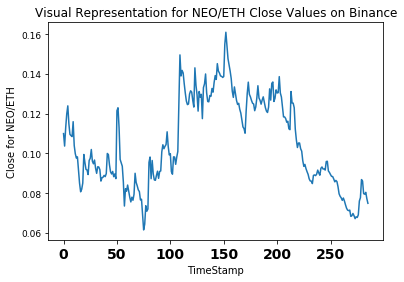

In [7]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import ccxt 
import pandas as pd 
import time 

data = pd.read_csv("PythonScripts/binance-NEOETH-1d.csv")
data.head()

x = data['TimeStamp']
data['Close'].plot(kind='line')


plt.xticks(fontsize=14, fontweight='bold')
plt.yticks(fontsize=9)
plt.xlabel('TimeStamp')
plt.ylabel('Close for NEO/ETH')
plt.title('Visual Representation for NEO/ETH Close Values on Binance')